<a href="https://colab.research.google.com/github/SwetaAgarwal30/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn import metrics

In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.head(912)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df['Age'].min(), df['Age'].max()

(28, 77)

In [ ]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

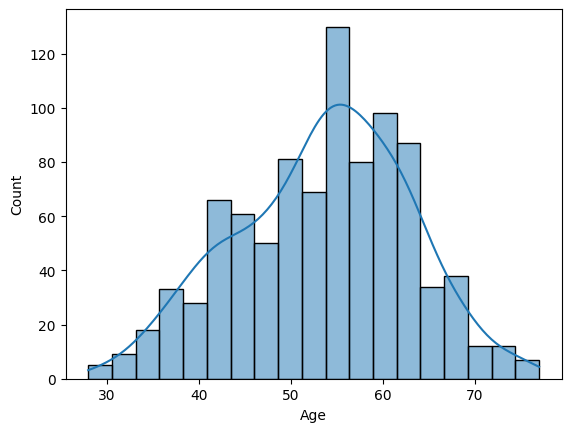

In [ ]:
sns.histplot(df['Age'], kde=True)

Mean 53.510893246187365
Median 54.0
Mode 0    54
Name: Age, dtype: int64


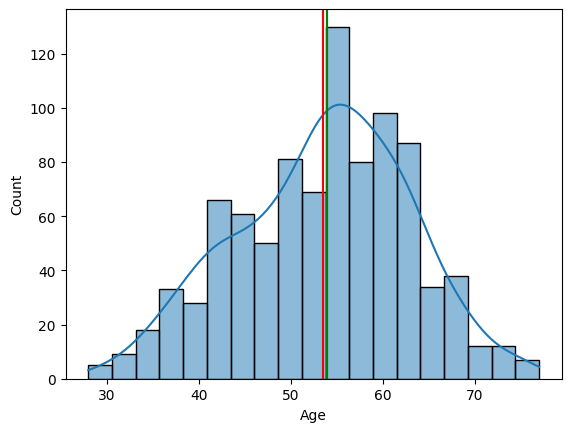

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(), color='Red')
plt.axvline(df['Age'].median(), color= 'Blue')
plt.axvline(df['Age'].mode()[0], color='Green')
print('Mean', df['Age'].mean())
print('Median', df['Age'].median())
print('Mode', df['Age'].mode())

In [ ]:
fig = px.histogram(data_frame=df, x='Age', color= 'Sex')
fig.show()


In [ ]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [ ]:
male_count=725
female_count=193
total_count=male_count+female_count
print('Male percentage in the data:', (male_count/total_count)*100)
print('Female percentage in the data :',(female_count/total_count)*100)
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

Male percentage in the data: 78.9760348583878
Female percentage in the data : 21.0239651416122
Males are 275.65% more than female in the data.


In [ ]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

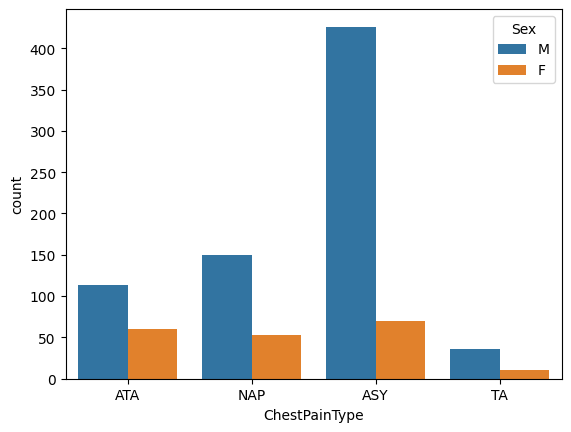

In [ ]:
sns.countplot(df, x='ChestPainType', hue= 'Sex')

In [ ]:
fig = px.histogram(data_frame=df, x='Age', color='ChestPainType')
fig.show()

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [ ]:
X=df.drop(labels='HeartDisease',axis=1)
y=df['HeartDisease']
y


0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,False,True,False,False,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,False,True,True,False,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,False,True,True,False,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,True,False,False,True,False,False,True,False,False,True,False,False,True,False


In [ ]:
X.shape

(918, 20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def logistic():
  from sklearn import metrics
  from sklearn.linear_model import LogisticRegression
  logistic_model = LogisticRegression()
  logistic_model.fit(X_train, y_train)
  logistic_predictions = logistic_model.predict(X_test)
  mae=mean_absolute_error(y_test,logistic_predictions)
  mse=mean_squared_error(y_test,logistic_predictions)
  mape=mean_absolute_percentage_error(y_test,logistic_predictions)
  print("Logistic Regression:")
  print("Accuracy:", round(accuracy_score(y_test, logistic_predictions)*100,3))
  print("Mean Absolute Error:",round(mae*100,2))
  print("Mean Squared Error:",round(mse*100,2))
  print("Mean Squared Percentage Error:",round(mape*100,2))
  print("Classification Report:\n", classification_report(y_test, logistic_predictions))
  print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))
  print('\n')
  print("Do you want to know whether you have any heart desease or not? ")
  pr=input("Do you ? --: ")
  if pr in ['No','no','n','nO','NO','0']:
    exit()
  elif pr in ['Yes','YES','y','Y','1','yes']:
    name=input("Can we know your name? ")
    ans=logistic_model.predict([ls()])
    if ans==0:
      print("\n")
      print(f"Dear {name} You Do not have any Heart Disease\n")
    elif ans==1:
      print("\n")
      print(f"Dear {name} we found you have chances of Heart failure.Please consult a doctor as soon as possible. Get well soon\n")
    else:
       print("\nValid Inputs please!\n")




In [ ]:
def randomforest():
  from sklearn.ensemble import RandomForestClassifier
  rf_model = RandomForestClassifier(random_state=42)
  rf_model.fit(X_train, y_train)
  rf_predictions = rf_model.predict(X_test)
  mae=mean_absolute_error(y_test,rf_predictions)
  mse=mean_squared_error(y_test,rf_predictions)
  mape=mean_absolute_percentage_error(y_test,rf_predictions)
  print("\nRandom Forest:")
  print("Accuracy:", round(accuracy_score(y_test, rf_predictions)*100,3))
  print("Mean Absolute Error:",round(mae*100,2))
  print("Mean Squared Error:",round(mse*100,2))
  print("Mean Squared Percentage Error:",round(mape*100,2))
  print("Classification Report:\n", classification_report(y_test, rf_predictions))
  print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
  print('\n')
  print("Do you want to know whether you have any heart desease or not? ")
  pr=input("Do you ? --: ")
  if pr in ['No','no','n','nO','NO','0']:
    exit()
  elif pr in ['Yes','YES','y','Y','1','yes']:
    name=input("Can we know your name? ")
    ans=rf_model.predict([ls()])
    if ans==0:
      print("\n")
      print(f"Dear {name} You Do not have any Heart Disease\n")
    elif ans==1:
      print("\n")
      print(f"Dear {name} we found you have chances of Heart failure.Please consult a doctor as soon as possible. Get well soon\n")
    else:
       print("\nValid Inputs please!\n")


In [ ]:
def svc():
  from sklearn.svm import SVC
  svm_model = SVC(kernel='linear', random_state=42)
  svm_model.fit(X_train, y_train)
  svm_predictions = svm_model.predict(X_test)
  mae=mean_absolute_error(y_test,svm_predictions)
  mse=mean_squared_error(y_test,svm_predictions)
  mape=mean_absolute_percentage_error(y_test,svm_predictions)
  print("\nSupport Vector Machine:")
  print("Accuracy:", round(accuracy_score(y_test, svm_predictions)*100,3))
  print("Mean Absolute Error:",round(mae*100,2))
  print("Mean Squared Error:",round(mse*100,2))
  print("Mean Squared Percentage Error:",round(mape*100,2))
  print("Classification Report:\n", classification_report(y_test, svm_predictions))
  print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
  print('\n')
  print("Do you want to know whether you have any heart desease or not? ")
  pr=input("Do you ? --: ")
  if pr in ['No','no','n','nO','NO','0']:
    exit()
  elif pr in ['Yes','YES','y','Y','1','yes']:
    name=input("Can we know your name? ")
    ans=svm_model.predict([ls()])
    if ans==0:
      print("\n")
      print(f"Dear {name} You Do not have any Heart Disease\n")
    elif ans==1:
      print("\n")
      print(f"Dear {name} we found you have chances of Heart failure.Please consult a doctor as soon as possible. Get well soon\n")
    else:
       print("\nValid Inputs please!\n")



In [ ]:
def gradientboosting():
  from sklearn.ensemble import GradientBoostingClassifier
  gb_model = GradientBoostingClassifier(random_state=42)
  gb_model.fit(X_train, y_train)
  gb_predictions = gb_model.predict(X_test)
  mae=mean_absolute_error(y_test,gb_predictions)
  mse=mean_squared_error(y_test,gb_predictions)
  mape=mean_absolute_percentage_error(y_test,gb_predictions)
  print("\nGradient Boosting:")
  print("Accuracy:", round(accuracy_score(y_test, gb_predictions)*100,3))
  print("Mean Absolute Error:",round(mae*100,2))
  print("Mean Squared Error:",round(mse*100,2))
  print("Mean Squared Percentage Error:",round(mape*100,2))
  print("Classification Report:\n", classification_report(y_test, gb_predictions))
  print("Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))
  print('\n')
  print("Do you want to know whether you have any heart desease or not? ")
  pr=input("Do you ? --: ")
  if pr in ['No','no','n','nO','NO','0']:
    exit()
  elif pr in ['Yes','YES','y','Y','1','yes']:
    name=input("Can we know your name? ")
    ans=gb_model.predict([ls()])
    if ans==0:
      print("\n")
      print(f"Dear {name} You Do not have any Heart Disease\n")
    elif ans==1:
      print("\n")
      print(f"Dear {name} we found you have chances of Heart failure.Please consult a doctor as soon as possible. Get well soon\n")
    else:
       print("\nValid Inputs please!\n")


In [ ]:
def dt():
  from sklearn import tree
  dt=tree.DecisionTreeClassifier(random_state=42)
  dt.fit(X_train,y_train)
  dt_prediction=dt.predict(X_test)
  mae=mean_absolute_error(y_test,dt_prediction)
  mse=mean_squared_error(y_test,dt_prediction)
  mape=mean_absolute_percentage_error(y_test,dt_prediction)
  print("\nDecision Tree:")
  print("Accuracy:", accuracy_score(y_test, dt_prediction)*100)
  print("Mean Absolute Error:",round(mae*100,2))
  print("Mean Squared Error:",round(mse*100,2))
  print("Mean Squared Percentage Error:",round(mape*100,2))
  print("Classification Report:\n", classification_report(y_test, dt_prediction))
  print("Confusion Matrix:\n", confusion_matrix(y_test, dt_prediction))
  print('\n')
  print("Do you want to know whether you have any heart desease or not? ")
  pr=input("Do you ? --: ")
  if pr in ['No','no','n','nO','NO','0']:
    exit()
  elif pr in ['Yes','YES','y','Y','1','yes']:
    name=input("Can we know your name? ")
    ans=dt.predict([ls()])
    if ans==0:
      print("\n")
      print(f"Dear {name} You Do not have any Heart Disease\n")
    elif ans==1:
      print("\n")
      print(f"Dear {name} we found you have chances of Heart failure.Please consult a doctor as soon as possible. Get well soon\n")
    else:
       print("\nValid Inputs please!\n")


In [ ]:
def Naive_bayes():
  from sklearn.naive_bayes import GaussianNB
  nb=GaussianNB()
  nb.fit(X_train,y_train)
  nb_prediction=nb.predict(X_test)
  mae=mean_absolute_error(y_test,nb_prediction)
  mse=mean_squared_error(y_test,nb_prediction)
  mape=mean_absolute_percentage_error(y_test,nb_prediction)
  print("\nNaive Bayes:")
  print("Accuracy:", accuracy_score(y_test, nb_prediction)*100)
  print("Mean Absolute Error:",round(mae*100,2))
  print("Mean Squared Error:",round(mse*100,2))
  print("Mean Squared Percentage Error:",round(mape*100,3))
  print("Classification Report:\n", classification_report(y_test, nb_prediction))
  print("Confusion Matrix:\n", confusion_matrix(y_test, nb_prediction))
  print('\n')
  print("Do you want to know whether you have any heart desease or not? ")
  pr=input("Do you ? --: ")
  if pr in ['No','no','n','nO','NO','0']:
    exit()
  elif pr in ['Yes','YES','y','Y','1','yes']:
    name=input("Can we know your name? ")
    ans=nb.predict([ls()])
    if ans==0:
      print("\n")
      print(f"Dear {name} You Do not have any Heart Disease. Stay happy.\n")
    elif ans==1:
      print("\n")
      print(f"Dear {name} we found you have chances of Heart failure.Please consult a doctor as soon as possible. Get well soon\n")
    else:
       print("\nValid Inputs please!\n")


In [ ]:
def ls():
  ls=[]
  for i in range(1):
    ls.append(int(input("Whats your age? ")))
    ls.append(int(input("Enter your Resting BP: ")))
    ls.append(int(input("Enter your Cholesterol amount: ")))
    ls.append(int(input("Enter your FastingBS: ")))
    ls.append(int(input("What is your MaxHR?: ")))
    ls.append(float(input("Your Oldpeak: ")))
#Auto boolean for sex
    sex=(input("Your Gender? (M or F): ").upper())
    if sex=='M':
      ls.append(bool())
      ls.append(bool(1))
    elif sex=='F':
      ls.append(bool(1))
      ls.append(bool())
    else:
      print("Enter Only Male or Female")
#Auto boolean for Chest Pain type
    chest_pain_type=input("Your ChestPainType? (ASY,ATA,NAP,TA): ").upper()
    if chest_pain_type=='NAP':
      ls.append(bool())
      ls.append(bool())
      ls.append(bool(1))
      ls.append(bool())
    elif chest_pain_type=='ASY':
      ls.append(bool(1))
      ls.append(bool())
      ls.append(bool())
      ls.append(bool())
    elif chest_pain_type=='ATA':
      ls.append(bool())
      ls.append(bool(1))
      ls.append(bool())
      ls.append(bool())
    elif chest_pain_type=='TA':
      ls.append(bool())
      ls.append(bool())
      ls.append(bool())
      ls.append(bool(1))
    else:
      print("ChestPainType can't recognisable")
#Auto resting ECG
    ECG=input("Enter your Resting ECG (LVH,Normal,ST): ").lower()

    if ECG=='normal':
      ls.append(bool())
      ls.append(bool(1))
      ls.append(bool())
    elif ECG=='lvh':
      ls.append(bool(0))
      ls.append(bool())
      ls.append(bool())
    elif ECG=='st':
      ls.append(bool())
      ls.append(bool())
      ls.append(bool(0))
    else:
      print("Resting ECG can't recognisable")
    exercise=input("your ExerciseAngina(N or Y): ").upper()
    if exercise=='N':
      ls.append(bool(1))
      ls.append(bool())
    elif exercise=='Y':
      ls.append(bool(0))
      ls.append(bool(1))
    else:
      print("Please, Enter valid value 'Y' for YES and 'N' for NO")
    st=input("Your ST Slope type(Up,Flat,Down): ").capitalize()
    if st=='Down':
      ls.append(bool(1))
      ls.append(bool())
      ls.append(bool())
    elif st=='Flat':
      ls.append(bool())
      ls.append(bool(1))
      ls.append(bool())
    elif st=='Up':
      ls.append(bool())
      ls.append(bool())
      ls.append(bool(1))
  return ls



In [ ]:
print("The model we've prepared \n1.Logistic Regression \n2.RandomForest Classifier \n3.SVC \n4.GradientBoosting Classifier\n5.Decision Tree\n6.Naive Bayes\n")
print("This Model gives best accuracy in Random Forest and GradientBoosting ")
choose=input("Please choose Your Desired model by its name--: ")
choose1=choose[0].lower()
print("You choose ")
print("\n")

match(choose1):
    case 'r':
      if choose in ['2','randomforest classifier', 'randomforest', 'random forest', 'random','randomforestclassifier','2']:
        randomforest()
      else:
        print("Did you mean 'RandomForest Classifier'?")
        ch = int(input("1 for YES\n0 for NO: "))
        if ch == 1:
          randomforest()
        else:
          print("The method you are looking for is not included in our model")
    case 'l':
      if choose in ['1','logistic regression','logistic','Logistic Regression','LogisticRegression','logisticregression']:
        logistic()
      else:
        print("Did you mean 'Logistic Regression'?")
        ch = int(input("1 for YES\n0 for NO: "))
        if ch == 1:
          logistic()
        else:
          print("The method you are looking for is not included in our model")
    case 's':
      if choose in ['3','svc','support vector machine','support vector','supportvector']:
        svc()
      else:
        print("Did you mean 'Support Vector Machine(SVM)'?")
        ch = int(input("1 for YES\n0 for NO: "))
        if ch == 1:
         svc()
        else:
          print("The method you are looking for is not included in our model")
    case 'g':
      if choose in ['4','gradientboosting','gradient','gradient boosting']:
        gradientboosting()
      else:
        print("Did you mean 'Gradient Boosting'?")
        ch = int(input("1 for YES\n0 for NO: "))
        if ch == 1:
         gradientboosting()
        else:
          print("The method you are looking for is not included in our model")
    case 'd':
      if choose in['5','Decisiontree','decisiontree','decision tree','tree','dt','DT','Decision tree']:
        dt()
      else:
        print("Did you mean 'Decision Tree'?")
        ch=int(input("1 for YES\n 0 for NO"))
        if ch == 1:
          dt()
        else:
          print("The method you are looking for is not included in our model")

    case 'n':
      if choose in ['6','Naivebayes','naivebayes','naive bayes','bayes','nb','NB','Naive Bayes']:
          Naive_bayes()
      else:
          print("Did you mean 'Naive Bayes'?")
          ch=int(input("1 for YES\n 0 for NO"))
          if ch == 1:
            Naive_bayes()
          else:
            print("The method you are looking for is not included in our model")

    case _: print("Write the appropriate name.\nThe Name you entered is not matching with any algorithm available.\nTRY AGAIN\nTHANK YOU!!!!!")



The model we've prepared 
1.Logistic Regression 
2.RandomForest Classifier 
3.SVC 
4.GradientBoosting Classifier
5.Decision Tree
6.Naive Bayes

This Model gives best accuracy in Random Forest and GradientBoosting 
